In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"


In [3]:
data = pd.read_csv(r"C:\Users\parth\Downloads\supplychain\supply_chain_data.csv")


In [5]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [21]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [34]:
fig = px.scatter(data, x= 'Price', y= 'Revenue generated', color = 'Product type', hover_data=['Number of products sold'], trendline="ols")
                 

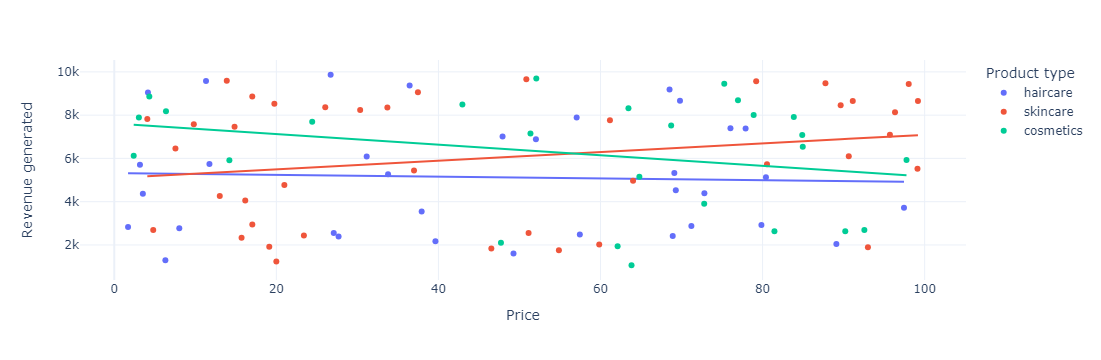

In [38]:
fig.show()

Thus, the company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate.

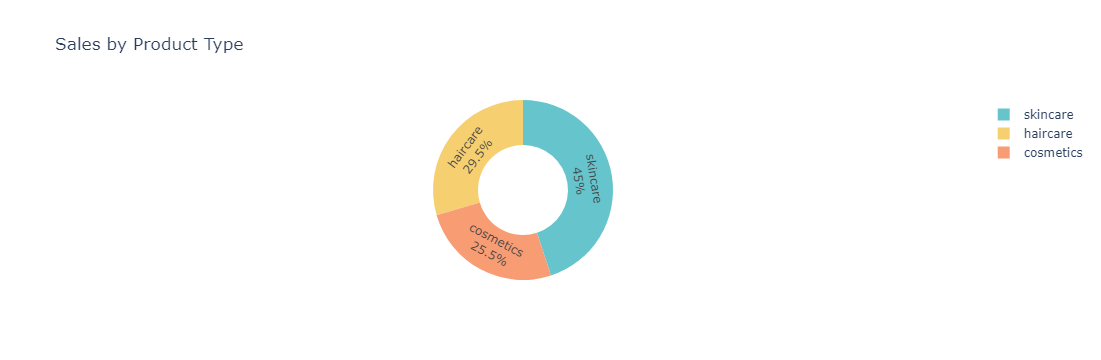

In [70]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type', 
                   title='Sales by Product Type', 
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()


45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.

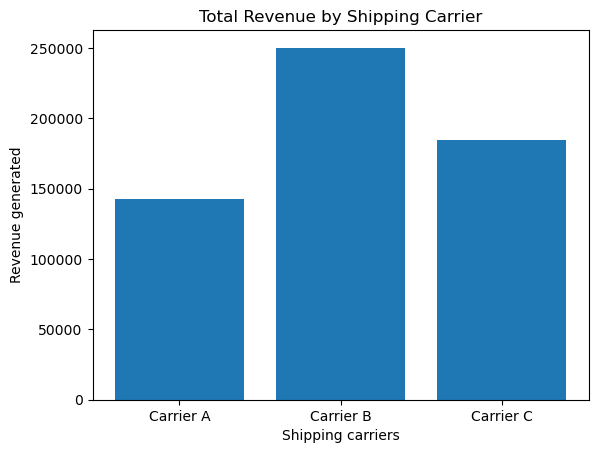

In [96]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
plt.bar(total_revenue['Shipping carriers'],total_revenue['Revenue generated'])
plt.xlabel('Shipping carriers')
plt.ylabel('Revenue generated')
plt.title('Total Revenue by Shipping Carrier')
plt.show()


The company is using three carriers for transportation, and Carrier B helps the company in generating more revenue.


In [133]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
result

,Product type,Average Lead Time,Average Manufacturing Costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


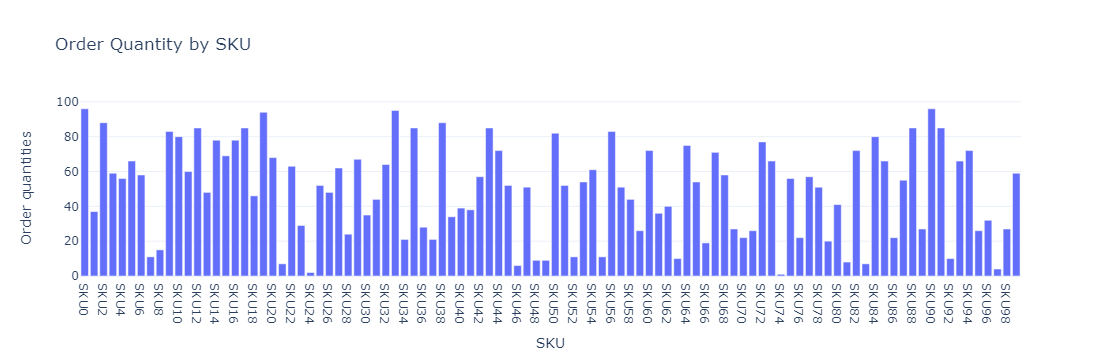

In [135]:
order_quantity_chart = px.bar(data, x='SKU', 
                              y='Order quantities', 
                              title='Order Quantity by SKU')
order_quantity_chart.show()

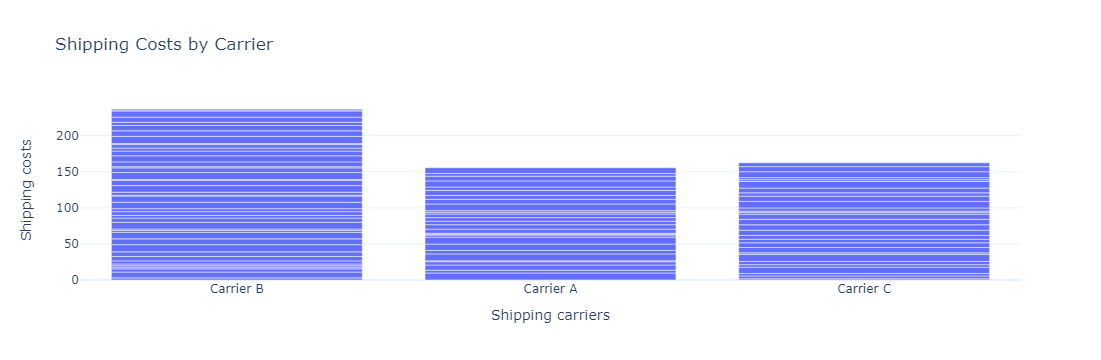

In [137]:
shipping_cost_chart = px.bar(data, x='Shipping carriers', 
                             y='Shipping costs', 
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show()

Carrier B helps the company in more revenue. It is also the most costly Carrier among the three.


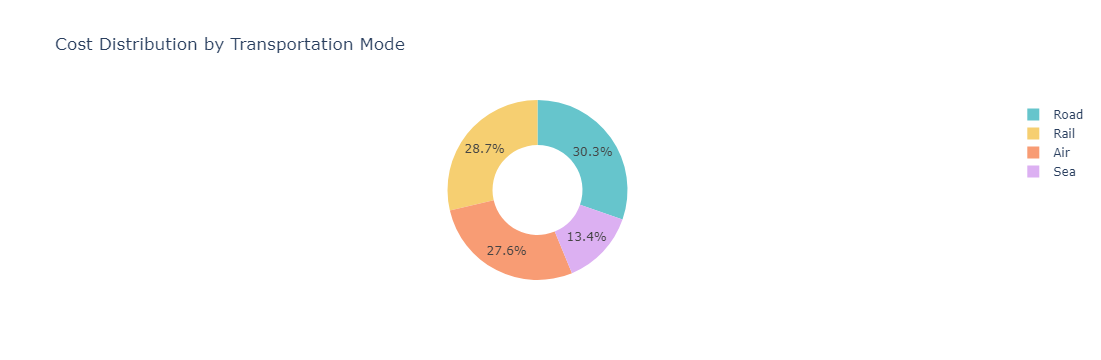

In [140]:
transportation_chart = px.pie(data, 
                              values='Costs', 
                              names='Transportation modes', 
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

Company spends more on Road and Rail modes of transportation for the transportation of Goods.

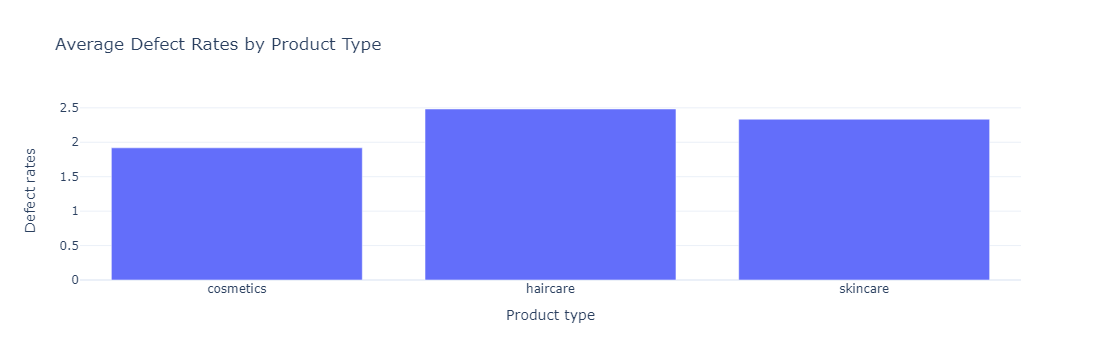

In [145]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show()

Defect rate of haircare products is higher.

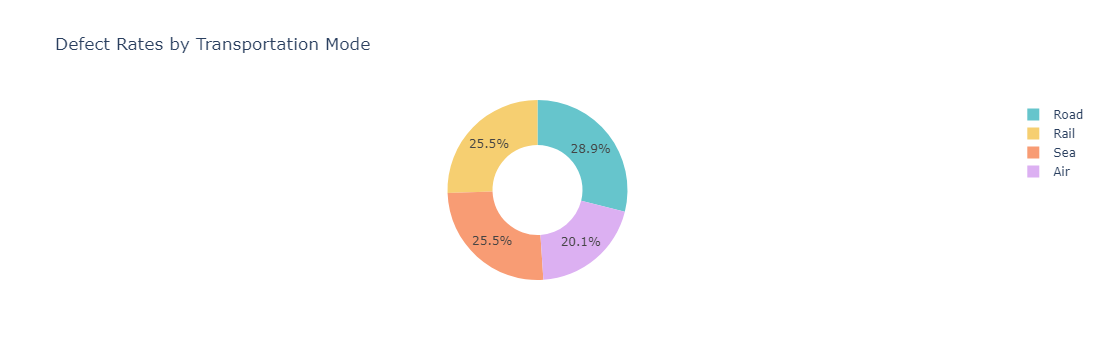

In [168]:
pivot_table = pd.pivot_table(data, values= 'Defect rates', index=['Transportation modes'],aggfunc='mean')
transportation_chart = px.pie(values=pivot_table["Defect rates"],names=pivot_table.index,
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate.

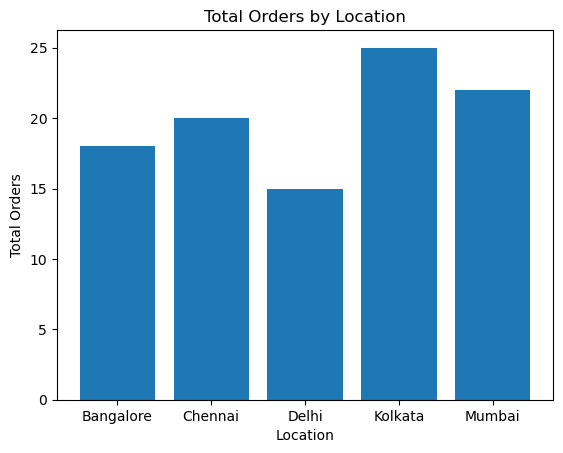

In [182]:
Orders_by_location = data.groupby('Location')['SKU'].count().reset_index()
plt.bar(Orders_by_location['Location'],Orders_by_location['SKU'])
plt.xlabel('Location')
plt.ylabel('Total Orders')
plt.title('Total Orders by Location')
plt.show()

Highest Number of orders are from Kolkata, followed by Mumbai, and Chennai

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (5,).

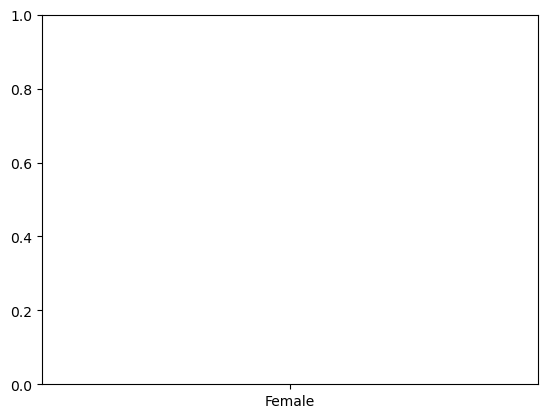

In [192]:
Orders_by_Gender = data.groupby('Customer demographics')['SKU'].count().reset_index()
plt.bar(Orders_by_Gender['Customer demographics'],Orders_by_location['SKU'])
plt.xlabel('Customer demographics')
plt.ylabel('Total Orders')
plt.title('Total Orders by Gender')
plt.show()

In [ ]:
Orders_by_Gender = data.groupby('Customer demographics')['SKU'].count().reset_index()